# Machine Learning Final Exam, Aug Semester, 2018

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.

Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 3 Guassians with distributions shaped roughly as shown in the diagram below. Plot the resulting 600 points with different colors for each Gaussian.

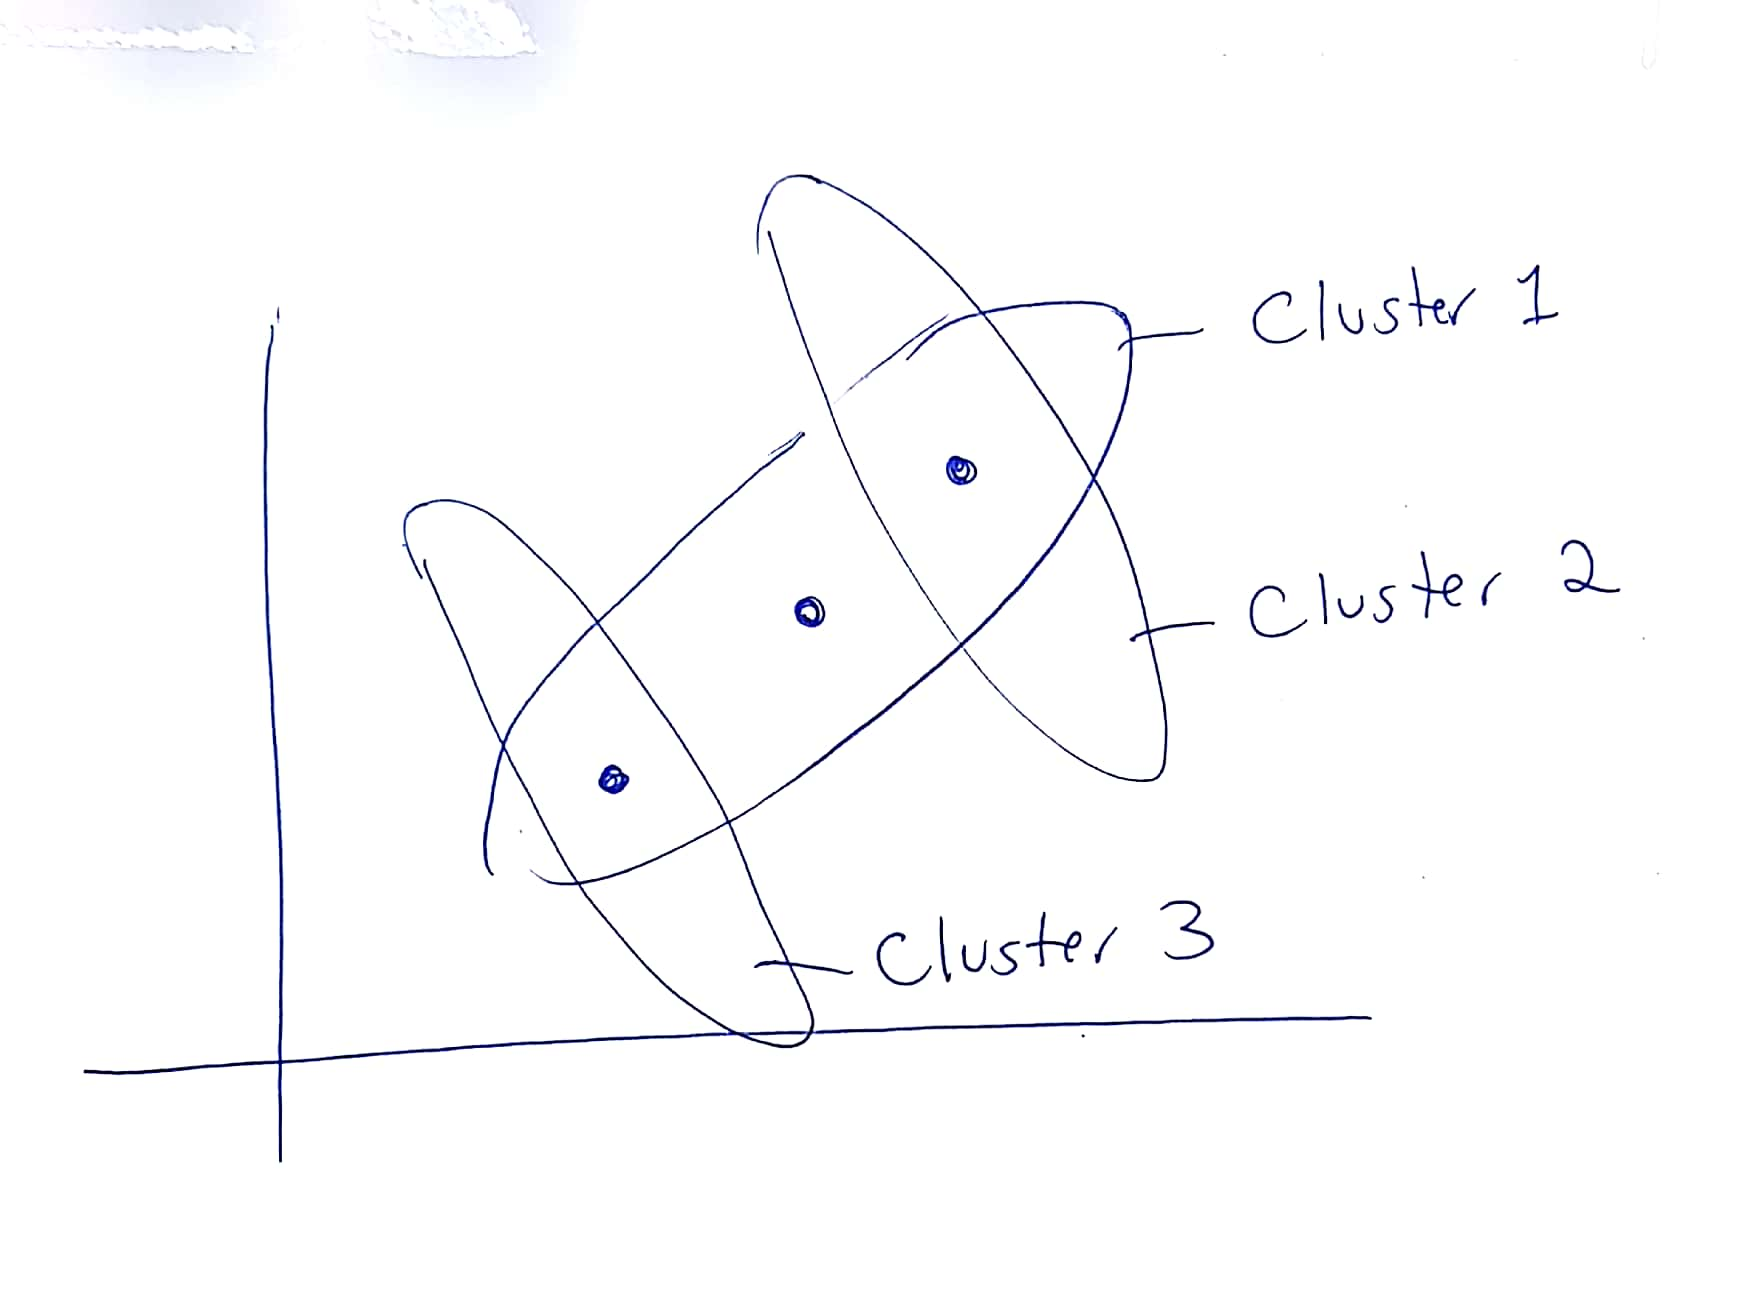

## Question 2 (10 points)

Fit a k-means model with k=3 to the data from Question 1. Plot the data with different colors indicating which cluster they are assigned to. Discuss whether it is a good model and why it is or is not good.

## Question 3 (20 points)

Fit a GMM with k=3 to the data from Question 1. Plot the data with different colors indicating which Gaussian component they are assigned to. Discuss whether it is a good model and why it is or is not good, in comparison to the k-means model.

## Question 4 (10 points)

Compare the Euclidean distortion for the 3 means learned by your k-means model in Question 2 and the 3 means learned by your GMM in Question 3. (By Euclidean distortion, we mean the sum squared Euclidean distance of the data points to their nearest means.) Which of the distortion values is lower?  Is the model with the lower Euclidean distortion the better model?  Why or why not?

## Question 5 (10 points)

Using the GMM model from Question 3, generate a LABELED dataset consisting of 200 points from each of the Gaussians, with the label of each point being the index of the Gaussian that generated it (1, 2, or 3).  Plot the data using different colors for the three components.

## Question 6 (30 points)

Split the data from Question 5 into a training set and validation set. Place 80% of the data in the training set and 20% of the data in the test set.  Fit a neural network to the training data. The model should have a single hidden ReLU hidden layer and a 3-output softmax layer with cross entropy loss function.  Build two models: one with a single unit in the hidden layer, and one with a sufficient number of units in the hidden layer to provide good classification results on both the training and validation sets. For the model with multiple hidden units, plot the loss on the training set and validation set as a function of training epoch.  Analyze the loss curves: do you see evidence of overtraining?  If so, how should you deal with it? If not, why not, and how can you be sure you're obtaining the best possible results?

## Question 7 (10 points)

Dicuss whether a linear SVM would be successful at accurately classifying the dataset you created in Question 5. Explain why it would or would not be successful If you think it would not be successful, suggest what type of SVM could accurately classify the dataset, and why it would.


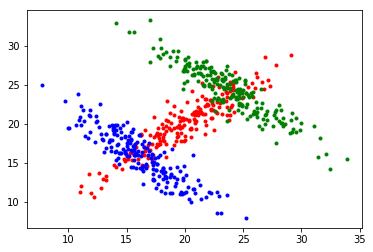

In [1]:
# Question 1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline 

mu = [[20,20], [16,16], [24,24]]
sigma_increase = [[10,9],[9,10]]
sigma_decrease = [[10,-9],[-9,10]]

num_of_clusters = 3
i = 0
c1 = np.random.multivariate_normal(mu[0], sigma_increase, 200)
c2 = np.random.multivariate_normal(mu[1], sigma_decrease, 200)
c3 = np.random.multivariate_normal(mu[2], sigma_decrease, 200)


plt.plot(c1.T[0],c1.T[1],'r.')
plt.plot(c2.T[0],c2.T[1],'b.')
plt.plot(c3.T[0],c3.T[1],'g.')

X = np.append(c1,c2, axis = 0)
X = np.append(X,c3, axis = 0)



In [2]:
#Question 2

from scipy.stats import multivariate_normal
from scipy.spatial import distance

n = 2
k = 3
m = 600
# Placeholders

Means = [([0]*n)]*k
C = [0]*m

def init_kmeans():
    order = np.random.permutation(m)
    for i in range(k):
        Means[i] = X[order[i],:]
    return

# Run one iteration of k-means
def iterate_kmeans():
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - Means[j])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        C[i] = min_j
        # X[i,0] = X[i,0] + 0.1 # If you want to play with the animation
    for i in range(k):
        Means[i] = [0,0]
        ni = 0
        for j in range(m):
            if C[j] == i:
                ni = ni+1
                Means[i] = Means[i] + X[i,:]
        if ni > 0:
            Means[i] = Means[i] / ni
    return

init_kmeans()
print("Initial KMeans:", Means)
iterate_kmeans()
print("KMeans:", Means)


Initial KMeans: [array([23.20854748, 23.86137412]), array([16.8691941 , 17.61179792]), array([21.58001982, 21.32134285])]
KMeans: [array([19.01510703, 17.33122621]), array([14.8365566 , 15.31709339]), array([16.26566018, 18.57423109])]


[320  54 396 108 505 264 274 402   6 510 448 159  68 520 225  74 348 497
 171 309 197 478 271  48   5 141 144 327 299 503 518  87 368 369  91 177
 374 102 346 530 595 316 324 429  64 283 590 412  13 101 398 233 246 249
 371 550 571 418 437  49  40 287 446 524 323 122 444 400 582 512  52 363
 336  26  99 352 162 415  70 438 525 142 375 476 591 131 244 482 239 362
 423 465 580  83 297 189 201 489 215 308 403 556 356  96 191 345 214 565
 419 560 470 288 319 501 313 166 343 399 388 145 450 218 192 349 451  24
 184 408 540 295 508 100 292 401 519 164 407  61 588 113 462 199 361 139
 119 564  53 474 387 172 555 178 196 428 358  78 372 182 333 306  11 153
 535 272 453 421 160 261 114   1 140 195 240 270 406 573 457 340 458 495
 183 221 304 224 430 483 397 553 307  41 350 544 417 127 536 213 572  14
  44 165 404 442 293 490   7   9 229  65 285 217  46 278  81 176 130 381
 170 549 194 354  20 585 370 598 390 481  79 245  77 445 558 248 268 552
  59 161 410  42 498 366 464 110 449 211 479 269 10

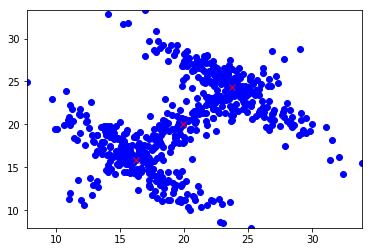

In [3]:
n = 2
k = 3
m = 600
# Placeholders

Mu = np.zeros((n,k))
# Sigma 3 dimensional 2,2 matrix
Sigma = np.zeros((k,n,n))
Phi = np.zeros(k)
W = np.zeros((m,k))

def init_gmm():
     # numpy.random.permutation(x)
    # Randomly permute a sequence, or return a permuted range.
    order = np.random.permutation(m)
    print(order)
    for j in range(k):
        #Initial assign equal probability to each cluster/outcome
        Phi[j] = 1/k
        # 2D Mean of data in 3 clusters
        # Choose 0,1,3 as index and X values from schuffle to assign
        # as Mu
        Mu[:,j] = X[order[j],:].T
        # numpy.eye(N, M=None, k=0, dtype=<type 'float'>, order='C')
        # Return a 2-D array with ones on the diagonal and zeros elsewhere.        
        # example: np.eye(0) -- array([[ 1.,  0.],[ 0.,  1.]])
        # Sigma[0,:,:] = np.eye(0)
        # Covariance matrix for 3 clusters
        Sigma[j,:,:] = np.eye(n)
    return

# Run one iteration of EM
def iterate_em_gmm():

    # E-step
    for j in range(k):
        # scipy.stats.multivariate_normal
        # returns a multivariate normal random variable based 
        # on values of mu and sigma for clusters
        pj = multivariate_normal(mean=Mu[:,j], cov=Sigma[j,:,:])
        # prior of clusters * probability of all data in each cluster
        W[:,j] = Phi[j] * pj.pdf(X)
    # Marginal probability of each data point across three clusters
    #numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    # W here tells us what is the relative weight/probability of each data point in all 3 clusters     
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T

    # M-step
    # Adjust mean and Sigma
    Phi[:] = sum(W) / m
    for j in range(k):
        # Split cluster specific W for each into two so that it can be applied to each variable
        Wj = np.tile(W[:,j],(2,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

# Do the animation. This code is based on
# http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((min(X[:,0]), max(X[:,0])))
ax.set_ylim((min(X[:,1]), max(X[:,1])))

points, = ax.plot(X[:,0], X[:,1], 'bo')
means = [None]*k
for j in range(k):
    means[j], = ax.plot(Mu[0,j], Mu[1,j], 'rx')

# Function to plot the kmeans data
def replot():
    points.set_data(X[:,0], X[:,1])
    for j in range(k):
        means[j].set_data(Mu[0,j], Mu[1,j])

# initialization function: plot the background of each frame
def init():
    #gen_dataset()
    init_gmm()
    replot()
    return ([points]+means)

# animation function. This is called sequentially
def animate(i):
    iterate_em_gmm()
    replot()
    return ([points]+means)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=1000, blit=True)

HTML(anim.to_html5_video())

In [11]:
#Question 3

dist_kmeans = np.array([np.linalg.norm(c1 - Means[0]), np.linalg.norm(c2 - Means[1]), np.linalg.norm(c3 - Means[2])])
mean_dist_kmeans = dist_kmeans/200

print('Average KMeans distance', mean_dist_kmeans)
dist_gmm = np.array([np.linalg.norm(c1 - Mu[:,0]), np.linalg.norm(c2 - Mu[:,0]), np.linalg.norm(c3 - Mu[:,0])])
mean_dist_GMM = dist_kmeans/200
print('Average GMM distance', mean_dist_GMM)

print('GMM should give lower Euclidean distance as data is elliptical, covariance not equal to 0.')
print('Im getting identical distance values for KMeans and GMM as I have used comparable values of mean and covriance')
print('to generate data and KMeans is able to interpret the clusters as circular data.')

Average KMeans distance [0.40357845 0.33179178 0.74584607]
Average GMM distance [0.40357845 0.33179178 0.74584607]
GMM should give lower Euclidean distance as data is elliptical, covariance not equal to 0.
Im getting identical distance values for KMeans and GMM as I have used comparable values of mean and covriance
to generate data and KMeans is able to interpret the clusters as circular data.


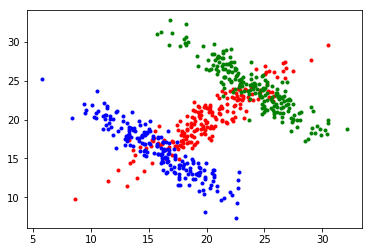

In [8]:
mu = [[20,20], [16,16], [24,24]]
sigma_increase = [[10,9],[9,10]]
sigma_decrease = [[10,-9],[-9,10]]

num_of_clusters = 3
i = 0
c1 = np.random.multivariate_normal(mu[0], sigma_increase, 200)
c2 = np.random.multivariate_normal(mu[1], sigma_decrease, 200)
c3 = np.random.multivariate_normal(mu[2], sigma_decrease, 200)



X = np.append(c1,c2, axis = 0)
X = np.append(X,c3, axis = 0)



y1 = np.repeat(1,200)
y2 = np.repeat(2,200)
y3 = np.repeat(3,200)

plt.plot(c1.T[0],c1.T[1],'r.')
plt.plot(c2.T[0],c2.T[1],'b.')
plt.plot(c3.T[0],c3.T[1],'g.')

Question # 7

Linear classifier will not be able to classify 3 classes for the data generated. It would probably result in classifying the data into 2 classes seperating green and blue point.

Gaussian RBF kernel could classify the data into three classes with small value for hyperparameter gamma and C as there are overlapping areas where there will be considerable misclassifications